In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import time
import json
import numpy
import matplotlib.pyplot as plt
import re
import seaborn as sns
from cliffs_delta import cliffs_delta
from scipy.stats import friedmanchisquare
from scipy import stats
from scipy.stats import kruskal
from sklearn.metrics import cohen_kappa_score





import warnings 
warnings. filterwarnings('ignore')

In [2]:
def calculate_cohen_kappa(df, col1, col2):
    """
    Calculate Cohen's Kappa for two columns in a pandas DataFrame.

    Parameters:
    - df: pandas DataFrame
    - col1: str, name of the first column
    - col2: str, name of the second column

    Returns:
    - kappa_score: float, Cohen's Kappa score
    """

    # Ensure the columns exist in the DataFrame
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Both specified columns must exist in the DataFrame.")

    # Extract the relevant columns
    column1 = df[col1]
    column2 = df[col2]

    # Ensure the columns have the same length
    if len(column1) != len(column2):
        raise ValueError("The columns must have the same length.")

    # Calculate Cohen's Kappa
    kappa_score = cohen_kappa_score(column1, column2)

    return kappa_score


In [3]:
try:
    df_tensorflow = pd.read_csv("raw_excel/analysis_issues_tensorflow.csv")
    npf_df_tensorflow = pd.read_csv("raw_excel/npf_analysis_issues_tensorflow.csv")
#     df_tensorflow = df_tensorflow.sort_values(by='Date_created', ascending=True)
    df_tensorflow["Source"] = npf_df_tensorflow["Source"] ="Tensorflow"
except Exception as e:
    print(f"{e}")
try:
    df_pytorch = pd.read_csv("raw_excel/analysis_issues_pytorch.csv")
    npf_df_pytorch = pd.read_csv("raw_excel/npf_analysis_issues_pytorch.csv")
    df_pytorch["Source"] = npf_df_pytorch["Source"] = "Pytorch"
#     df_pytorch = df_pytorch.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_keras = pd.read_csv("raw_excel/analysis_issues_keras.csv")
    npf_df_keras = pd.read_csv("raw_excel/npf_analysis_issues_keras.csv")
    df_keras["Source"] = npf_df_keras["Source"] = "Keras"
#     df_keras = df_keras.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")    
try:
    df_jax = pd.read_csv("raw_excel/analysis_issues_jax.csv")
    npf_df_jax = pd.read_csv("raw_excel/npf_analysis_issues_jax.csv")
#     df_jax = df_jax.sort_values(by='Date_created', ascending=True)
    df_jax["Source"] = npf_df_jax["Source"] = "Jax"
except Exception as e:
    print(f"{e}")
try:
    df_mxnet = pd.read_csv("raw_excel/analysis_issues_mxnet.csv")
    npf_df_mxnet = pd.read_csv("raw_excel/npf_analysis_issues_mxnet.csv")
    df_mxnet["Source"] = npf_df_mxnet["Source"] ="MXNET"
#     df_mxnet = df_mxnet.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_deeplearning4j = pd.read_csv("raw_excel/analysis_issues_deeplearning4j.csv")
    npf_df_deeplearning4j = pd.read_csv("raw_excel/npf_analysis_issues_deeplearning4j.csv")
    df_deeplearning4j["Source"] = npf_df_deeplearning4j["Source"] = "Deeplearning4j"
#     df_deeplearning4j = df_deeplearning4j.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_aspnetcore = pd.read_csv("raw_excel/analysis_issues_aspnetcore.csv")
    npf_df_aspnetcore = pd.read_csv("raw_excel/npf_analysis_issues_aspnetcore.csv")
    df_aspnetcore["Source"] = npf_df_aspnetcore["Source"] = "Aspnetcore"
#     df_aspnetcore = df_aspnetcore.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_yii2 = pd.read_csv("raw_excel/analysis_issues_yii2.csv")
    npf_df_yii2 = pd.read_csv("raw_excel/analysis_issues_yii2.csv")
    df_yii2["Source"] = npf_df_yii2["Source"] = "Yii2"
#     df_yii2 = df_yii2.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_spring = pd.read_csv("raw_excel/analysis_issues_spring-framework.csv")
    npf_df_spring = pd.read_csv("raw_excel/npf_analysis_issues_spring-framework.csv")
    df_spring["Source"] = npf_df_spring["Source"] = "Spring"
#     df_spring = df_spring.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_CodeIgniter4 = pd.read_csv("raw_excel/analysis_issues_CodeIgniter4.csv")
    npf_df_CodeIgniter4 = pd.read_csv("raw_excel/npf_analysis_issues_CodeIgniter4.csv")
    df_CodeIgniter4["Source"] = npf_df_CodeIgniter4["Source"] = "CodeIgniter4"
#     df_CodeIgniter4 = df_CodeIgniter4.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_node = pd.read_csv("raw_excel/analysis_issues_node.csv")
    npf_df_node = pd.read_csv("raw_excel/npf_analysis_issues_node.csv")
    df_node["Source"] = npf_df_node["Source"] = "Node"
#     df_node = df_node.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_symfony = pd.read_csv("raw_excel/analysis_issues_symfony.csv")
    npf_df_symfony = pd.read_csv("raw_excel/npf_analysis_issues_symfony.csv")
    df_symfony["Source"] = npf_df_symfony["Source"] = "Symfony"
#     df_symfony = df_symfony.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")

        

In [4]:
start_date = "2018-01-01"
end_date = "2023-05-30"
dff_tensorflow = df_tensorflow[(df_tensorflow['Date_created'] >= start_date) & (df_tensorflow['Date_created'] <= end_date) & (df_tensorflow['Commit_sha'].notnull())]
dff_pytorch = df_pytorch[(df_pytorch['Date_created'] >= start_date) & (df_pytorch['Date_created'] <= end_date) & (df_pytorch['Commit_sha'].notnull())]
dff_keras = df_keras[(df_keras['Date_created'] >= start_date) & (df_keras['Date_created'] <= end_date) & (df_keras['Commit_sha'].notnull())]
dff_jax = df_jax[(df_jax['Date_created'] >= start_date) & (df_jax['Date_created'] <= end_date) & (df_jax['Commit_sha'].notnull())]
dff_mxnet = df_mxnet[(df_mxnet['Date_created'] >= start_date) & (df_mxnet['Date_created'] <= end_date) & (df_mxnet['Commit_sha'].notnull())]
dff_deeplearning4j = df_deeplearning4j[(df_deeplearning4j['Date_created'] >= start_date) & (df_deeplearning4j['Date_created'] <= end_date) & (df_deeplearning4j['Commit_sha'].notnull())]
dff_aspnetcore = df_aspnetcore[(df_aspnetcore['Date_created'] >= start_date) & (df_aspnetcore['Date_created'] <= end_date) & (df_aspnetcore['Commit_sha'].notnull())]
dff_yii2 = df_yii2[(df_yii2['Date_created'] >= start_date) & (df_yii2['Date_created'] <= end_date) & (df_yii2['Commit_sha'].notnull())]
dff_spring = df_spring[(df_spring['Date_created'] >= start_date) & (df_spring['Date_created'] <= end_date) & (df_spring['Commit_sha'].notnull())]
dff_CodeIgniter4 = df_CodeIgniter4[(df_CodeIgniter4['Date_created'] >= start_date) & (df_CodeIgniter4['Date_created'] <= end_date) & (df_CodeIgniter4['Commit_sha'].notnull())]
dff_node = df_node[(df_node['Date_created'] >= start_date) & (df_node['Date_created'] <= end_date) & (df_node['Commit_sha'].notnull())]
dff_symfony = df_symfony[(df_symfony['Date_created'] >= start_date) & (df_symfony['Date_created'] <= end_date) & (df_symfony['Commit_sha'].notnull())]



npf_dff_tensorflow = npf_df_tensorflow[(npf_df_tensorflow['Date_created'] >= start_date) & (npf_df_tensorflow['Date_created'] <= end_date) & (npf_df_tensorflow['Commit_sha'].notnull())]
npf_dff_pytorch = npf_df_pytorch[(npf_df_pytorch['Date_created'] >= start_date) & (npf_df_pytorch['Date_created'] <= end_date) & (npf_df_pytorch['Commit_sha'].notnull())]
npf_dff_keras = npf_df_keras[(npf_df_keras['Date_created'] >= start_date) & (npf_df_keras['Date_created'] <= end_date) & (npf_df_keras['Commit_sha'].notnull())]
npf_dff_jax = npf_df_jax[(npf_df_jax['Date_created'] >= start_date) & (npf_df_jax['Date_created'] <= end_date) & (npf_df_jax['Commit_sha'].notnull())]
npf_dff_mxnet = npf_df_mxnet[(npf_df_mxnet['Date_created'] >= start_date) & (npf_df_mxnet['Date_created'] <= end_date) & (npf_df_mxnet['Commit_sha'].notnull())]
npf_dff_deeplearning4j = npf_df_deeplearning4j[(npf_df_deeplearning4j['Date_created'] >= start_date) & (npf_df_deeplearning4j['Date_created'] <= end_date) & (npf_df_deeplearning4j['Commit_sha'].notnull())]
npf_dff_aspnetcore = npf_df_aspnetcore[(npf_df_aspnetcore['Date_created'] >= start_date) & (npf_df_aspnetcore['Date_created'] <= end_date) & (npf_df_aspnetcore['Commit_sha'].notnull())]
npf_dff_yii2 = npf_df_yii2[(npf_df_yii2['Date_created'] >= start_date) & (npf_df_yii2['Date_created'] <= end_date) & (npf_df_yii2['Commit_sha'].notnull())]
npf_dff_spring = npf_df_spring[(npf_df_spring['Date_created'] >= start_date) & (npf_df_spring['Date_created'] <= end_date) & (npf_df_spring['Commit_sha'].notnull())]
npf_dff_CodeIgniter4 = npf_df_CodeIgniter4[(npf_df_CodeIgniter4['Date_created'] >= start_date) & (npf_df_CodeIgniter4['Date_created'] <= end_date) & (npf_df_CodeIgniter4['Commit_sha'].notnull())]
npf_dff_node = npf_df_node[(npf_df_node['Date_created'] >= start_date) & (npf_df_node['Date_created'] <= end_date) & (npf_df_node['Commit_sha'].notnull())]
npf_dff_symfony = npf_df_symfony[(npf_df_symfony['Date_created'] >= start_date) & (npf_df_symfony['Date_created'] <= end_date) & (npf_df_symfony['Commit_sha'].notnull())]




In [5]:
selected_tensorflow_df = dff_tensorflow[['Title', 'Commit_sha', 'Source']]; selected_tensorflow_df['Issue URL'] = "https://github.com/tensorflow/tensorflow/issues/" + dff_tensorflow['Number'].astype(str); selected_tensorflow_df = selected_tensorflow_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_tensorflow_df = selected_tensorflow_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_tensorflow_df['Review1 Summary'] = selected_tensorflow_df['Review1 Category'] =  selected_tensorflow_df['Review1 Root Cause']= selected_tensorflow_df['Review1 Comment'] = selected_tensorflow_df['Review2 Summary'] = selected_tensorflow_df[' Review2 Category'] =  selected_tensorflow_df['Review2 Root Cause']= selected_tensorflow_df['Review2 Comment'] = selected_tensorflow_df['Agreement'] = ''

selected_pytorch_df = dff_pytorch[['Title', 'Commit_sha', 'Source']]; selected_pytorch_df['Issue URL'] = "https://github.com/pytorch/pytorch/issues/" + dff_pytorch['Number'].astype(str); selected_pytorch_df = selected_pytorch_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_pytorch_df = selected_pytorch_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_pytorch_df['Review1 Summary'] = selected_pytorch_df['Review1 Category'] =  selected_pytorch_df['Review1 Root Cause']= selected_pytorch_df['Review1 Comment'] = selected_pytorch_df['Review2 Summary'] = selected_pytorch_df[' Review2 Category'] =  selected_pytorch_df['Review2 Root Cause']= selected_pytorch_df['Review2 Comment'] = selected_pytorch_df['Agreement'] = ''

selected_keras_df = dff_keras[['Title', 'Commit_sha', 'Source']]; selected_keras_df['Issue URL'] = "https://github.com/keras-team/keras/issues/" + dff_keras['Number'].astype(str); selected_keras_df = selected_keras_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_keras_df = selected_keras_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_keras_df['Review1 Summary'] = selected_keras_df['Review1 Category'] =  selected_keras_df['Review1 Root Cause']= selected_keras_df['Review1 Comment'] = selected_keras_df['Review2 Summary'] = selected_keras_df[' Review2 Category'] =  selected_keras_df['Review2 Root Cause']= selected_keras_df['Review2 Comment'] = selected_keras_df['Agreement'] = ''

selected_jax_df = dff_jax[['Title', 'Commit_sha', 'Source']]; selected_jax_df['Issue URL'] = "https://github.com/google/jax/issues/" + dff_jax['Number'].astype(str); selected_jax_df = selected_jax_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_jax_df = selected_jax_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_jax_df['Review1 Summary'] = selected_jax_df['Review1 Category'] =  selected_jax_df['Review1 Root Cause']= selected_jax_df['Review1 Comment'] = selected_jax_df['Review2 Summary'] = selected_jax_df[' Review2 Category'] =  selected_jax_df['Review2 Root Cause']= selected_jax_df['Review2 Comment'] = selected_jax_df['Agreement'] = ''

selected_mxnet_df = dff_mxnet[['Title', 'Commit_sha', 'Source']]; selected_mxnet_df['Issue URL'] = "https://github.com/apache/mxnet/issues/" + dff_mxnet['Number'].astype(str); selected_mxnet_df = selected_mxnet_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_mxnet_df = selected_mxnet_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_mxnet_df['Review1 Summary'] = selected_mxnet_df['Review1 Category'] =  selected_mxnet_df['Review1 Root Cause']= selected_mxnet_df['Review1 Comment'] = selected_mxnet_df['Review2 Summary'] = selected_mxnet_df[' Review2 Category'] =  selected_mxnet_df['Review2 Root Cause']= selected_mxnet_df['Review2 Comment'] = selected_mxnet_df['Agreement'] = ''

selected_deeplearning4j_df = dff_deeplearning4j[['Title', 'Commit_sha', 'Source']]; selected_deeplearning4j_df['Issue URL'] = "https://github.com/deeplearning4j/deeplearning4j/issues/" + dff_deeplearning4j['Number'].astype(str); selected_deeplearning4j_df = selected_deeplearning4j_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_deeplearning4j_df = selected_deeplearning4j_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_deeplearning4j_df['Review1 Summary'] = selected_deeplearning4j_df['Review1 Category'] =  selected_deeplearning4j_df['Review1 Root Cause']= selected_deeplearning4j_df['Review1 Comment'] = selected_deeplearning4j_df['Review2 Summary'] = selected_deeplearning4j_df[' Review2 Category'] =  selected_deeplearning4j_df['Review2 Root Cause']= selected_deeplearning4j_df['Review2 Comment'] = selected_deeplearning4j_df['Agreement'] = ''

selected_aspnetcore_df = dff_aspnetcore[['Title', 'Commit_sha', 'Source']]; selected_aspnetcore_df['Issue URL'] = "https://github.com/dotnet/aspnetcore/issues/" + dff_aspnetcore['Number'].astype(str); selected_aspnetcore_df = selected_aspnetcore_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_aspnetcore_df = selected_aspnetcore_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_aspnetcore_df['Review1 Summary'] = selected_aspnetcore_df['Review1 Category'] =  selected_aspnetcore_df['Review1 Root Cause']= selected_aspnetcore_df['Review1 Comment'] = selected_aspnetcore_df['Review2 Summary'] = selected_aspnetcore_df[' Review2 Category'] =  selected_aspnetcore_df['Review2 Root Cause']= selected_aspnetcore_df['Review2 Comment'] = selected_aspnetcore_df['Agreement'] = ''

selected_yii2_df = dff_yii2[['Title', 'Commit_sha', 'Source']]; selected_yii2_df['Issue URL'] = "https://github.com/yiisoft/yii2/issues/" + dff_yii2['Number'].astype(str); selected_yii2_df = selected_yii2_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_yii2_df = selected_yii2_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_yii2_df['Review1 Summary'] = selected_yii2_df['Review1 Category'] =  selected_yii2_df['Review1 Root Cause']= selected_yii2_df['Review1 Comment'] = selected_yii2_df['Review2 Summary'] = selected_yii2_df[' Review2 Category'] =  selected_yii2_df['Review2 Root Cause']= selected_yii2_df['Review2 Comment'] = selected_yii2_df['Agreement'] = ''

selected_spring_df = dff_spring[['Title', 'Commit_sha', 'Source']]; selected_spring_df['Issue URL'] = "https://github.com/spring-projects/spring-framework/issues/" + dff_spring['Number'].astype(str); selected_spring_df = selected_spring_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_spring_df = selected_spring_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_spring_df['Review1 Summary'] = selected_spring_df['Review1 Category'] =  selected_spring_df['Review1 Root Cause']= selected_spring_df['Review1 Comment'] = selected_spring_df['Review2 Summary'] = selected_spring_df[' Review2 Category'] =  selected_spring_df['Review2 Root Cause']= selected_spring_df['Review2 Comment'] = selected_spring_df['Agreement'] = ''

selected_CodeIgniter4_df = dff_CodeIgniter4[['Title', 'Commit_sha', 'Source']]; selected_CodeIgniter4_df['Issue URL'] = "https://github.com/codeigniter4/CodeIgniter4/issues/" + dff_CodeIgniter4['Number'].astype(str); selected_CodeIgniter4_df = selected_CodeIgniter4_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_CodeIgniter4_df = selected_CodeIgniter4_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_CodeIgniter4_df['Review1 Summary'] = selected_CodeIgniter4_df['Review1 Category'] =  selected_CodeIgniter4_df['Review1 Root Cause']= selected_CodeIgniter4_df['Review1 Comment'] = selected_CodeIgniter4_df['Review2 Summary'] = selected_CodeIgniter4_df[' Review2 Category'] =  selected_CodeIgniter4_df['Review2 Root Cause']= selected_CodeIgniter4_df['Review2 Comment'] = selected_CodeIgniter4_df['Agreement'] = ''

selected_node_df = dff_node[['Title', 'Commit_sha', 'Source']]; selected_node_df['Issue URL'] = "https://github.com/nodejs/node/issues/" + dff_node['Number'].astype(str); selected_node_df = selected_node_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_node_df = selected_node_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_node_df['Review1 Summary'] = selected_node_df['Review1 Category'] =  selected_node_df['Review1 Root Cause']= selected_node_df['Review1 Comment'] = selected_node_df['Review2 Summary'] = selected_node_df[' Review2 Category'] =  selected_node_df['Review2 Root Cause']= selected_node_df['Review2 Comment'] = selected_node_df['Agreement'] = ''

selected_symfony_df = dff_symfony[['Title', 'Commit_sha', 'Source']]; selected_symfony_df['Issue URL'] = "https://github.com/symfony/symfony/issues/" + dff_symfony['Number'].astype(str); selected_symfony_df = selected_symfony_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); selected_symfony_df = selected_symfony_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; selected_symfony_df['Review1 Summary'] = selected_symfony_df['Review1 Category'] =  selected_symfony_df['Review1 Root Cause']= selected_symfony_df['Review1 Comment'] = selected_symfony_df['Review2 Summary'] = selected_symfony_df[' Review2 Category'] =  selected_symfony_df['Review2 Root Cause']= selected_symfony_df['Review2 Comment'] = selected_symfony_df['Agreement'] = ''



# Non performance bugs
npf_selected_tensorflow_df = npf_dff_tensorflow[['Title', 'Commit_sha', 'Source']]; npf_selected_tensorflow_df['Issue URL'] = "https://github.com/tensorflow/tensorflow/issues/" + npf_dff_tensorflow['Number'].astype(str); npf_selected_tensorflow_df = npf_selected_tensorflow_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_tensorflow_df = npf_selected_tensorflow_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_tensorflow_df['Review1 Summary'] = npf_selected_tensorflow_df['Review1 Category'] =  npf_selected_tensorflow_df['Review1 Root Cause']= npf_selected_tensorflow_df['Review1 Comment'] = npf_selected_tensorflow_df['Review2 Summary'] = npf_selected_tensorflow_df[' Review2 Category'] =  npf_selected_tensorflow_df['Review2 Root Cause']= npf_selected_tensorflow_df['Review2 Comment'] = npf_selected_tensorflow_df['Agreement'] = ''

npf_selected_pytorch_df = npf_dff_pytorch[['Title', 'Commit_sha', 'Source']]; npf_selected_pytorch_df['Issue URL'] = "https://github.com/pytorch/pytorch/issues/" + npf_dff_pytorch['Number'].astype(str); npf_selected_pytorch_df = npf_selected_pytorch_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_pytorch_df = npf_selected_pytorch_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_pytorch_df['Review1 Summary'] = npf_selected_pytorch_df['Review1 Category'] =  npf_selected_pytorch_df['Review1 Root Cause']= npf_selected_pytorch_df['Review1 Comment'] = npf_selected_pytorch_df['Review2 Summary'] = npf_selected_pytorch_df[' Review2 Category'] =  npf_selected_pytorch_df['Review2 Root Cause']= npf_selected_pytorch_df['Review2 Comment'] = npf_selected_pytorch_df['Agreement'] = ''

npf_selected_keras_df = npf_dff_keras[['Title', 'Commit_sha', 'Source']]; npf_selected_keras_df['Issue URL'] = "https://github.com/keras-team/keras/issues/" + npf_dff_keras['Number'].astype(str); npf_selected_keras_df = npf_selected_keras_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_keras_df = npf_selected_keras_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_keras_df['Review1 Summary'] = npf_selected_keras_df['Review1 Category'] =  npf_selected_keras_df['Review1 Root Cause']= npf_selected_keras_df['Review1 Comment'] = npf_selected_keras_df['Review2 Summary'] = npf_selected_keras_df[' Review2 Category'] =  npf_selected_keras_df['Review2 Root Cause']= npf_selected_keras_df['Review2 Comment'] = npf_selected_keras_df['Agreement'] = ''

npf_selected_jax_df = npf_dff_jax[['Title', 'Commit_sha', 'Source']]; npf_selected_jax_df['Issue URL'] = "https://github.com/google/jax/issues/" + npf_dff_jax['Number'].astype(str); npf_selected_jax_df = npf_selected_jax_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_jax_df = npf_selected_jax_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_jax_df['Review1 Summary'] = npf_selected_jax_df['Review1 Category'] =  npf_selected_jax_df['Review1 Root Cause']= npf_selected_jax_df['Review1 Comment'] = npf_selected_jax_df['Review2 Summary'] = npf_selected_jax_df[' Review2 Category'] =  npf_selected_jax_df['Review2 Root Cause']= npf_selected_jax_df['Review2 Comment'] = npf_selected_jax_df['Agreement'] = ''

npf_selected_mxnet_df = npf_dff_mxnet[['Title', 'Commit_sha', 'Source']]; npf_selected_mxnet_df['Issue URL'] = "https://github.com/apache/mxnet/issues/" + npf_dff_mxnet['Number'].astype(str); npf_selected_mxnet_df = npf_selected_mxnet_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_mxnet_df = npf_selected_mxnet_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_mxnet_df['Review1 Summary'] = npf_selected_mxnet_df['Review1 Category'] =  npf_selected_mxnet_df['Review1 Root Cause']= npf_selected_mxnet_df['Review1 Comment'] = npf_selected_mxnet_df['Review2 Summary'] = npf_selected_mxnet_df[' Review2 Category'] =  npf_selected_mxnet_df['Review2 Root Cause']= npf_selected_mxnet_df['Review2 Comment'] = npf_selected_mxnet_df['Agreement'] = ''

npf_selected_deeplearning4j_df = npf_dff_deeplearning4j[['Title', 'Commit_sha', 'Source']]; npf_selected_deeplearning4j_df['Issue URL'] = "https://github.com/deeplearning4j/deeplearning4j/issues/" + npf_dff_deeplearning4j['Number'].astype(str); npf_selected_deeplearning4j_df = npf_selected_deeplearning4j_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_deeplearning4j_df = npf_selected_deeplearning4j_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_deeplearning4j_df['Review1 Summary'] = npf_selected_deeplearning4j_df['Review1 Category'] =  npf_selected_deeplearning4j_df['Review1 Root Cause']= npf_selected_deeplearning4j_df['Review1 Comment'] = npf_selected_deeplearning4j_df['Review2 Summary'] = npf_selected_deeplearning4j_df[' Review2 Category'] =  npf_selected_deeplearning4j_df['Review2 Root Cause']= npf_selected_deeplearning4j_df['Review2 Comment'] = npf_selected_deeplearning4j_df['Agreement'] = ''

npf_selected_aspnetcore_df = npf_dff_aspnetcore[['Title', 'Commit_sha', 'Source']]; npf_selected_aspnetcore_df['Issue URL'] = "https://github.com/dotnet/aspnetcore/issues/" + npf_dff_aspnetcore['Number'].astype(str); npf_selected_aspnetcore_df = npf_selected_aspnetcore_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_aspnetcore_df = npf_selected_aspnetcore_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_aspnetcore_df['Review1 Summary'] = npf_selected_aspnetcore_df['Review1 Category'] =  npf_selected_aspnetcore_df['Review1 Root Cause']= npf_selected_aspnetcore_df['Review1 Comment'] = npf_selected_aspnetcore_df['Review2 Summary'] = npf_selected_aspnetcore_df[' Review2 Category'] =  npf_selected_aspnetcore_df['Review2 Root Cause']= npf_selected_aspnetcore_df['Review2 Comment'] = npf_selected_aspnetcore_df['Agreement'] = ''

npf_selected_yii2_df = npf_dff_yii2[['Title', 'Commit_sha', 'Source']]; npf_selected_yii2_df['Issue URL'] = "https://github.com/yiisoft/yii2/issues/" + npf_dff_yii2['Number'].astype(str); npf_selected_yii2_df = npf_selected_yii2_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_yii2_df = npf_selected_yii2_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_yii2_df['Review1 Summary'] = npf_selected_yii2_df['Review1 Category'] =  npf_selected_yii2_df['Review1 Root Cause']= npf_selected_yii2_df['Review1 Comment'] = npf_selected_yii2_df['Review2 Summary'] = npf_selected_yii2_df[' Review2 Category'] =  npf_selected_yii2_df['Review2 Root Cause']= npf_selected_yii2_df['Review2 Comment'] = npf_selected_yii2_df['Agreement'] = ''

npf_selected_spring_df = npf_dff_spring[['Title', 'Commit_sha', 'Source']]; npf_selected_spring_df['Issue URL'] = "https://github.com/spring-projects/spring-framework/issues/" + npf_dff_spring['Number'].astype(str); npf_selected_spring_df = npf_selected_spring_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_spring_df = npf_selected_spring_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_spring_df['Review1 Summary'] = npf_selected_spring_df['Review1 Category'] =  npf_selected_spring_df['Review1 Root Cause']= npf_selected_spring_df['Review1 Comment'] = npf_selected_spring_df['Review2 Summary'] = npf_selected_spring_df[' Review2 Category'] =  npf_selected_spring_df['Review2 Root Cause']= npf_selected_spring_df['Review2 Comment'] = npf_selected_spring_df['Agreement'] = ''

npf_selected_CodeIgniter4_df = npf_dff_CodeIgniter4[['Title', 'Commit_sha', 'Source']]; npf_selected_CodeIgniter4_df['Issue URL'] = "https://github.com/codeigniter4/CodeIgniter4/issues/" + npf_dff_CodeIgniter4['Number'].astype(str); npf_selected_CodeIgniter4_df = npf_selected_CodeIgniter4_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_CodeIgniter4_df = npf_selected_CodeIgniter4_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_CodeIgniter4_df['Review1 Summary'] = npf_selected_CodeIgniter4_df['Review1 Category'] =  npf_selected_CodeIgniter4_df['Review1 Root Cause']= npf_selected_CodeIgniter4_df['Review1 Comment'] = npf_selected_CodeIgniter4_df['Review2 Summary'] = npf_selected_CodeIgniter4_df[' Review2 Category'] =  npf_selected_CodeIgniter4_df['Review2 Root Cause']= npf_selected_CodeIgniter4_df['Review2 Comment'] = npf_selected_CodeIgniter4_df['Agreement'] = ''

npf_selected_node_df = npf_dff_node[['Title', 'Commit_sha', 'Source']]; npf_selected_node_df['Issue URL'] = "https://github.com/nodejs/node/issues/" + npf_dff_node['Number'].astype(str); npf_selected_node_df = npf_selected_node_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_node_df = npf_selected_node_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_node_df['Review1 Summary'] = npf_selected_node_df['Review1 Category'] =  npf_selected_node_df['Review1 Root Cause']= npf_selected_node_df['Review1 Comment'] = npf_selected_node_df['Review2 Summary'] = npf_selected_node_df[' Review2 Category'] =  npf_selected_node_df['Review2 Root Cause']= npf_selected_node_df['Review2 Comment'] = npf_selected_node_df['Agreement'] = ''

npf_selected_symfony_df = npf_dff_symfony[['Title', 'Commit_sha', 'Source']]; npf_selected_symfony_df['Issue URL'] = "https://github.com/symfony/symfony/issues/" + npf_dff_symfony['Number'].astype(str); npf_selected_symfony_df = npf_selected_symfony_df.sample(n=20, random_state=42).rename(columns={'Source': 'Framework', 'Commit_sha': 'Fixing Commit'}); npf_selected_symfony_df = npf_selected_symfony_df[['Framework', 'Issue URL', 'Title', 'Fixing Commit']]; npf_selected_symfony_df['Review1 Summary'] = npf_selected_symfony_df['Review1 Category'] =  npf_selected_symfony_df['Review1 Root Cause']= npf_selected_symfony_df['Review1 Comment'] = npf_selected_symfony_df['Review2 Summary'] = npf_selected_symfony_df[' Review2 Category'] =  npf_selected_symfony_df['Review2 Root Cause']= npf_selected_symfony_df['Review2 Comment'] = npf_selected_symfony_df['Agreement'] = ''


In [6]:
# concat all together
perf_dl = pd.concat([selected_tensorflow_df,selected_pytorch_df,selected_keras_df,selected_jax_df,selected_mxnet_df,selected_deeplearning4j_df], axis=0)
perf_ndl = pd.concat([selected_aspnetcore_df, selected_yii2_df,selected_spring_df,selected_CodeIgniter4_df,selected_node_df,selected_symfony_df], axis=0)
npf_dlf = pd.concat([npf_selected_tensorflow_df,npf_selected_pytorch_df,npf_selected_keras_df,npf_selected_jax_df,npf_selected_mxnet_df,npf_selected_deeplearning4j_df], axis=0)
npf_ndlf = pd.concat([npf_selected_aspnetcore_df,npf_selected_yii2_df,npf_selected_spring_df,npf_selected_CodeIgniter4_df,npf_selected_node_df,npf_selected_symfony_df], axis=0)


In [7]:
# concatenated_array.to_csv("AutoGenerated_Bug_taxonmy.csv", index=False)

In [8]:
//
cwith pd.ExcelWriter('AutoGenerated_Bug_taxonmy.xlsx', engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    perf_dl.to_excel(writer, sheet_name='Perf Deep Learning', index=False)
    perf_ndl.to_excel(writer, sheet_name='Perf Non-deep Learning', index=False)
    npf_dlf.to_excel(writer, sheet_name='Non-perf Deep Learning ', index=False)
    npf_ndlf.to_excel(writer, sheet_name='Non-perf Non-deep Learning', index=False)

SyntaxError: invalid syntax (1266456480.py, line 1)

### Now Lets analyze the labeling

In [56]:
replacement_dict = {1: 'NGS', 2: 'MaCom', 3: 'MaOps',4:'NN-IMPL',5:'CoE',6:'IR-Def',7:'Regr',8:'Dep',9:'API-INT',10:'CoS',11:'DaT',12:'Doc',13:'PI',14:'DaS',15:'PKE',16:'Others'}


excel_file_path = 'AAutoGenerated_Bug_taxonmy.xlsx'
sheet1_name = 'Perf Deep Learning'  
sheet2_name = 'Perf Non-deep Learning'  
sheet3_name = 'Non-perf Deep Learning'  
sheet4_name = 'Non-perf Non-deep Learning'

# Read the specified sheet into a DataFrame
# df_sheet1 = pd.read_excel(excel_file_path, sheet1_name); df_sheet1 = df_sheet1.dropna(subset=['Review1 Category']); df_sheet1[['Review1 Category', 'Review1 Root Cause', 'Review2 Category', 'Review2 Root Cause', 'Agreement']] = df_sheet1[['Review1 Category', 'Review1 Root Cause', 'Review2 Category', 'Review2 Root Cause', 'Agreement']].astype(int)

df_sheet1 = pd.read_excel(excel_file_path, sheet1_name)
df_sheet1 = df_sheet1.dropna(subset=['Review1 Category','Review1 Root Cause','Review2 Category','Review2 Root Cause'])
df_sheet1[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']] = df_sheet1[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']].astype(int)
df_sheet1['Cat_Agreement'] = np.where(df_sheet1['Review1 Category'] == df_sheet1['Review2 Category'], df_sheet1['Review1 Category'], 0)
df_sheet1['Cause_Agreement'] = np.where(df_sheet1['Review1 Root Cause'] == df_sheet1['Review2 Root Cause'], df_sheet1['Review1 Root Cause'], 0)

df_sheet2 = pd.read_excel(excel_file_path, sheet2_name)
df_sheet2 = df_sheet2.dropna(subset=['Review1 Category','Review1 Root Cause','Review2 Category']) # i removed the ,'Review2 Root Cause' column from this line cos it was giving 119 rows instead of 120
df_sheet2[['Review1 Category', 'Review1 Root Cause','Review2 Category']] = df_sheet2[['Review1 Category', 'Review1 Root Cause','Review2 Category']].astype(int)
df_sheet2['Cat_Agreement'] = np.where(df_sheet2['Review1 Category'] == df_sheet2['Review2 Category'], df_sheet2['Review1 Category'], 0)
df_sheet2['Cause_Agreement'] = np.where(df_sheet2['Review1 Root Cause'] == df_sheet2['Review2 Root Cause'], df_sheet2['Review1 Root Cause'], 0)

df_sheet3 = pd.read_excel(excel_file_path, sheet3_name)
df_sheet3 = df_sheet3.dropna(subset=['Review1 Category','Review1 Root Cause','Review2 Category','Review2 Root Cause'])
df_sheet3[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']] = df_sheet3[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']].astype(int)
df_sheet3['Cat_Agreement'] = np.where(df_sheet3['Review1 Category'] == df_sheet3['Review2 Category'], df_sheet3['Review1 Category'], 0)
df_sheet3['Cause_Agreement'] = np.where(df_sheet3['Review1 Root Cause'] == df_sheet3['Review2 Root Cause'], df_sheet3['Review1 Root Cause'], 0)

df_sheet4 = pd.read_excel(excel_file_path, sheet4_name)
df_sheet4 = df_sheet4.dropna(subset=['Review1 Category','Review1 Root Cause','Review2 Category','Review2 Root Cause'])
df_sheet4[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']] = df_sheet4[['Review1 Category', 'Review1 Root Cause','Review2 Category','Review2 Root Cause']].astype(int)
df_sheet4['Cat_Agreement'] = np.where(df_sheet4['Review1 Category'] == df_sheet4['Review2 Category'], df_sheet4['Review1 Category'], 0)
df_sheet4['Cause_Agreement'] = np.where(df_sheet4['Review1 Root Cause'] == df_sheet4['Review2 Root Cause'], df_sheet4['Review1 Root Cause'], 0)


# Counting each category - with bias, we choose the first review exercise
unique_perf_dl = df_sheet1['Review1 Category'].value_counts()
result_unique_perf_dl = pd.DataFrame({'unique_values_perf_dl': unique_perf_dl.index, 'Counts': unique_perf_dl.values}).sort_values(by='unique_values_perf_dl')
unique_perf_ndl = df_sheet2['Review1 Category'].value_counts()
result_unique_perf_ndl = pd.DataFrame({'unique_values_perf_ndl': unique_perf_ndl.index, 'Counts': unique_perf_ndl.values}).sort_values(by='unique_values_perf_ndl')

unique_nperf_dl = df_sheet3['Review1 Category'].value_counts()
result_unique_nperf_dl = pd.DataFrame({'unique_values_nperf_dl': unique_nperf_dl.index, 'Counts': unique_nperf_dl.values}).sort_values(by='unique_values_nperf_dl')
unique_nperf_ndl = df_sheet4['Review1 Category'].value_counts()
result_unique_nperf_ndl = pd.DataFrame({'unique_values_nperf_ndl': unique_nperf_ndl.index, 'Counts': unique_nperf_ndl.values}).sort_values(by='unique_values_nperf_ndl')



# Counting each unique value in the 'column_name'...based on the agreement of the labeling excercise
aggr_unique_perf_dl = df_sheet1['Cat_Agreement'].value_counts()
aggr_result_unique_perf_dl = pd.DataFrame({'unique_values_perf_dl': unique_perf_dl.index, 'Counts': unique_perf_dl.values}).sort_values(by='unique_values_perf_dl')
aggr_unique_perf_ndl = df_sheet2['Cat_Agreement'].value_counts()
aggr_result_unique_perf_ndl = pd.DataFrame({'unique_values_perf_ndl': unique_perf_ndl.index, 'Counts': unique_perf_ndl.values}).sort_values(by='unique_values_perf_ndl')

aggr_unique_nperf_dl = df_sheet3['Cat_Agreement'].value_counts()
aggr_result_unique_nperf_dl = pd.DataFrame({'unique_values_nperf_dl': unique_nperf_dl.index, 'Counts': unique_nperf_dl.values}).sort_values(by='unique_values_nperf_dl')
aggr_unique_nperf_ndl = df_sheet4['Cat_Agreement'].value_counts()
aggr_result_unique_nperf_ndl = pd.DataFrame({'unique_values_nperf_ndl': unique_nperf_ndl.index, 'Counts': unique_nperf_ndl.values}).sort_values(by='unique_values_nperf_ndl')


aggr_result_unique_perf_dl['unique_values_perf_dl']  = aggr_result_unique_perf_dl['unique_values_perf_dl'].replace(replacement_dict)
aggr_result_unique_perf_ndl['unique_values_perf_ndl']  = aggr_result_unique_perf_ndl['unique_values_perf_ndl'].replace(replacement_dict)

aggr_result_unique_nperf_dl['unique_values_nperf_dl']  = aggr_result_unique_nperf_dl['unique_values_nperf_dl'].replace(replacement_dict)
aggr_result_unique_nperf_ndl['unique_values_nperf_ndl']  = aggr_result_unique_nperf_ndl['unique_values_nperf_ndl'].replace(replacement_dict)


# calculate their percentage
total = 240
aggr_result_unique_perf_dl['DLF_percentage'] = (aggr_result_unique_perf_dl['Counts'] / total) * 100
aggr_result_unique_perf_ndl['NDLF_percentage'] = (aggr_result_unique_perf_ndl['Counts'] / total) * 100

aggr_result_unique_nperf_dl['DLF_percentage'] = (aggr_result_unique_nperf_dl['Counts'] / total) * 100
aggr_result_unique_nperf_ndl['NDLF_percentage'] = (aggr_result_unique_nperf_ndl['Counts'] / total) * 100


# Calculate the maximum percentage value for setting x-ticks
aggr_max_percentage_value = max(
    aggr_result_unique_perf_dl['DLF_percentage'].max(),
    aggr_result_unique_perf_ndl['NDLF_percentage'].max(),
    aggr_result_unique_nperf_dl['DLF_percentage'].max(),
    aggr_result_unique_nperf_ndl['NDLF_percentage'].max()
)



### Kappa Agreement

In [15]:
# lets combine the dlf and ndl for each pb and npb
# result_df_pb = pd.concat([df_sheet1, df_sheet2], axis=0)
# result_df_npb = pd.concat([df_sheet3, df_sheet4], axis=0)

# # Calculate Cohen Kappa agreement pb and NPB for bioth DLF and NDLF
# kappa_score_pb = calculate_cohen_kappa(result_df_pb, "Review1 Category", "Review2 Category")
# kappa_score_npb = calculate_cohen_kappa(result_df_npb, "Review1 Category", "Review2 Category")


# # Calculate Cohen Kappa agreement each sheet
kappa_score_perf_dl = calculate_cohen_kappa(df_sheet1, "Review1 Category", "Review2 Category")
kappa_score_perf_ndl = calculate_cohen_kappa(df_sheet2, "Review1 Category", "Review2 Category")
kappa_score_nperf_dl = calculate_cohen_kappa(df_sheet3, "Review1 Category", "Review2 Category")
kappa_score_nperf_ndl = calculate_cohen_kappa(df_sheet4, "Review1 Category", "Review2 Category")

# lets combine the dlf and ndl for each pb and npb

kappa_score_perf_dl, kappa_score_perf_ndl, kappa_score_nperf_dl, kappa_score_nperf_ndl

(0.6850143175310213,
 0.4371664240659875,
 0.6293285644610632,
 0.45069065210407966)

In [16]:
# Merge DataFrames on the 'Category' column
# merged_df = pd.merge(df1, df2, on='Category', suffixes=('_group1', '_group2'))

In [34]:
# For the stacked bar chart


bar_unique_perf_dl = df_sheet1['Review1 Category'].value_counts()
bar_result_unique_perf_dl = pd.DataFrame({'unique_values': unique_perf_dl.index, 'DLF': unique_perf_dl.values})
bar_unique_perf_ndl = df_sheet2['Review1 Category'].value_counts()
bar_result_unique_perf_ndl = pd.DataFrame({'unique_values': unique_perf_ndl.index, 'NDLF': unique_perf_ndl.values})

bar_merged_df = pd.merge(bar_result_unique_perf_dl, bar_result_unique_perf_ndl, on='unique_values', how='outer' )
bar_merged_df['DLF'] = bar_merged_df['DLF'].fillna(0).astype(int)
bar_merged_df['NDLF'] = bar_merged_df['NDLF'].fillna(0).astype(int)

bar_merged_df['unique_values']  = bar_merged_df['unique_values'].replace(replacement_dict)


# Now for npb
npb_bar_unique_nperf_dl = df_sheet3['Review1 Category'].value_counts()
npb_bar_result_unique_nperf_dl = pd.DataFrame({'unique_values': unique_nperf_dl.index, 'DLF': unique_nperf_dl.values})
npb_bar_unique_nperf_ndl = df_sheet4['Review1 Category'].value_counts()
npb_bar_result_unique_nperf_ndl = pd.DataFrame({'unique_values': unique_nperf_ndl.index, 'NDLF': unique_nperf_ndl.values})

npb_bar_merged_df = pd.merge(npb_bar_result_unique_nperf_dl, npb_bar_result_unique_nperf_ndl, on='unique_values', how='outer' )
npb_bar_merged_df['DLF'] = npb_bar_merged_df['DLF'].fillna(0).astype(int)
npb_bar_merged_df['NDLF'] = npb_bar_merged_df['NDLF'].fillna(0).astype(int)

npb_bar_merged_df['unique_values']  = npb_bar_merged_df['unique_values'].replace(replacement_dict)



In [18]:

# Create a stacked horizontal bar chart
# plt.barh(bar_merged_df['unique_values'], bar_merged_df['DLF'], label='DLF', color='gray')
# plt.barh(bar_merged_df['unique_values'], bar_merged_df['NDLF'], left=bar_merged_df['DLF'], label='NDLF',color='#e3e3e3' )

    
# plt.grid(True, linestyle='--', alpha=0.09)

# plt.xlabel('Values')
# plt.ylabel('Bug Categories')
# plt.title('Bug Categorization in Performance Bugs')

# # Adding legend
# plt.legend()

# # Display the chart
# plt.show()

In [19]:
# Create a stacked horizontal bar chart
# plt.barh(npb_bar_merged_df['unique_values'], npb_bar_merged_df['DLF'], label='DLF', color='gray')
# plt.barh(npb_bar_merged_df['unique_values'], npb_bar_merged_df['NDLF'], left=npb_bar_merged_df['DLF'], label='NDLF',color='#e3e3e3' )

    
# plt.grid(True, linestyle='--', alpha=0.09)

# plt.xlabel('Frequency')
# plt.ylabel('Bug Categories')
# plt.title('Bug Categorization in Non-Performance Bugs')

# # Adding legend
# plt.legend()

# # Display the chart
# plt.show()

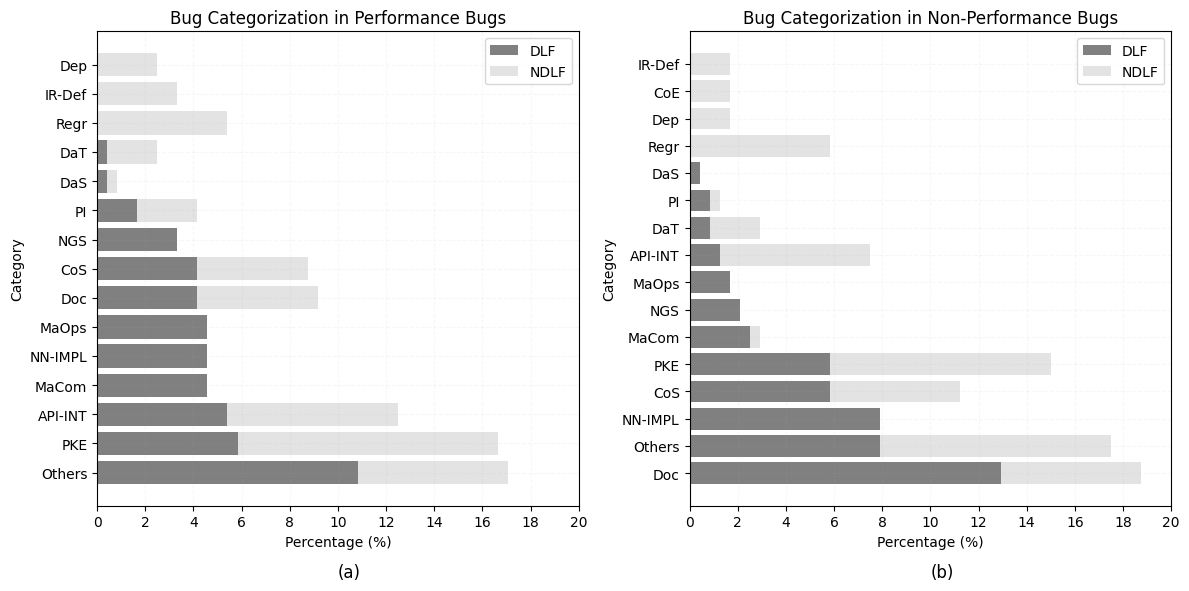

In [20]:
# Calculate percentages
total = 240
bar_merged_df['DLF_percentage'] = (bar_merged_df['DLF'] / total) * 100
bar_merged_df['NDLF_percentage'] = (bar_merged_df['NDLF'] / total) * 100

npb_bar_merged_df['DLF_percentage'] = (npb_bar_merged_df['DLF'] / total) * 100
npb_bar_merged_df['NDLF_percentage'] = (npb_bar_merged_df['NDLF'] / total) * 100



# Calculate the maximum percentage value for setting x-ticks
max_percentage_value = max(
    bar_merged_df['DLF_percentage'].max(),
    bar_merged_df['NDLF_percentage'].max(),
    npb_bar_merged_df['DLF_percentage'].max(),
    npb_bar_merged_df['NDLF_percentage'].max()
)


# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
axes[0].barh(bar_merged_df['unique_values'], bar_merged_df['DLF_percentage'], label='DLF', color='gray')
axes[0].barh(bar_merged_df['unique_values'], bar_merged_df['NDLF_percentage'], left=bar_merged_df['DLF_percentage'], label='NDLF', color='#e3e3e3')
axes[0].set_xlabel('Percentage (%)')
axes[0].set_ylabel('Category')
axes[0].set_title('Bug Categorization in Performance Bugs')
axes[0].legend()

# Add label 'a' to the first subplot
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, size=12)
axes[0].grid(True, linestyle='--', alpha=0.09)
axes[0].set_xticks(np.arange(0, max_percentage_value + 8, 2))



# Second subplot
axes[1].barh(npb_bar_merged_df['unique_values'], npb_bar_merged_df['DLF_percentage'], label='DLF', color='gray')
axes[1].barh(npb_bar_merged_df['unique_values'], npb_bar_merged_df['NDLF_percentage'], left=npb_bar_merged_df['DLF_percentage'], label='NDLF', color='#e3e3e3')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Category')
axes[1].set_title('Bug Categorization in Non-Performance Bugs')
axes[1].legend()

# Add label 'b' to the second subplot
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, size=12)
axes[1].grid(True, linestyle='--', alpha=0.09)
axes[1].set_xticks(np.arange(0, max_percentage_value + 8, 2))



# Adjust layout for better spacing
plt.tight_layout()

# plt.savefig("outputs/bug_categorization_pb_and_npb.pdf")

# Show the plot
# plt.show()


In [73]:
# # Create a figure with two rows and two columns of subplots for pie charts
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# # Plot the first pie chart in the top-left subplot
# axs[0, 0].pie(aggr_result_unique_perf_dl['DLF_percentage'], labels=aggr_result_unique_perf_dl['unique_values_perf_dl'], autopct='%1.1f%%', startangle=90)
# axs[0, 0].set_title('PB In DLF')
# centre_circle = plt.Circle((0, 0), 0.40, fc='white')
# axs[0, 0].add_artist(centre_circle)
# axs[0, 0].axis('equal')

# # Plot the second pie chart in the top-right subplot
# axs[0, 1].pie(aggr_result_unique_perf_ndl['NDLF_percentage'], labels=aggr_result_unique_perf_ndl['unique_values_perf_ndl'], autopct='%1.1f%%', startangle=90)
# axs[0, 1].set_title('PB In NDLF')
# centre_circle = plt.Circle((0, 0), 0.40, fc='white')
# axs[0, 1].add_artist(centre_circle)
# axs[0, 1].axis('equal')

# # Plot the third pie chart in the bottom-left subplot
# axs[1, 0].pie(aggr_result_unique_perf_dl['DLF_percentage'], labels=aggr_result_unique_perf_dl['unique_values_perf_dl'], autopct='%1.1f%%', startangle=90)
# axs[1, 0].set_title('PB In DLF')
# centre_circle = plt.Circle((0, 0), 0.40, fc='white')
# axs[1, 0].add_artist(centre_circle)
# axs[1, 0].axis('equal')

# # Plot the fourth pie chart in the bottom-right subplot
# axs[1, 1].pie(aggr_result_unique_perf_ndl['NDLF_percentage'], labels=aggr_result_unique_perf_ndl['unique_values_perf_ndl'], autopct='%1.1f%%', startangle=90)
# axs[1, 1].set_title('PB In NDLF')
# centre_circle = plt.Circle((0, 0), 0.40, fc='white')
# axs[1, 1].add_artist(centre_circle)
# axs[1, 1].axis('equal')

# # Adjust layout for better spacing
# plt.tight_layout()

# # Display the pie charts
# plt.show()


In [24]:
# bar_merged_df['diff_unique_values'] = bar_merged_df['DLF_percentage'] - bar_merged_df['NDLF_percentage']
# npb_bar_merged_df['diff_unique_values'] =npb_bar_merged_df['DLF_percentage'] - npb_bar_merged_df['NDLF_percentage']
